# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.1f}'.format

Считали данные из файла

In [ ]:
try:
    data = pd.read_csv('C:/Users/Student/Desktop/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('./real_estate_data.csv', sep='\t')

Первые 10 строк

In [3]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски есть в более чем половине столбцов

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


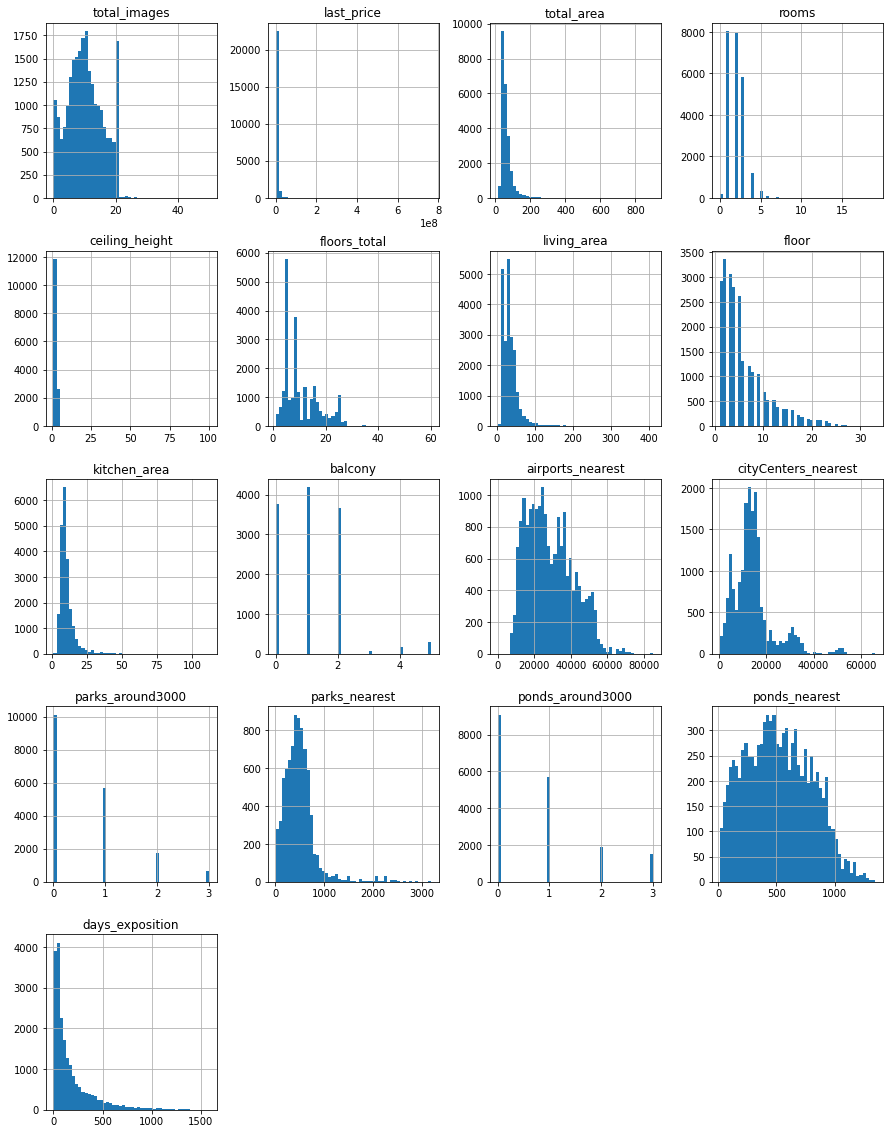

In [6]:
data.hist(figsize=(15, 20), bins=50);

По данным гистограммам и общей информации о данных можем сделать следующие выводы:
- В некоторых колонках имеются выбросы и редкие значения, из-за чего гистограмма мало информативна (столбцы ceiling_height, last_price, total_area)
- В более чем половине столбцов есть пропущенные значения (ceiling_height, is_apartment)
- Данные в некоторых столбцах имеют неверный тип (first_day_exposition, is_apartment)

### Выполните предобработку данных

пропущенные значения

In [7]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data.loc[data['days_exposition'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
44,13,"5,350,000.0",40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,"30,471.0","11,603.0",1.0,620.0,1.0,"1,152.0",NaN
45,17,"5,200,000.0",50.6,2018-12-02T00:00:00,2,2.6,9.0,30.3,7,NaN,...,7.0,NaN,Санкт-Петербург,"30,011.0","12,872.0",0.0,NaN,0.0,NaN,NaN
46,17,"6,600,000.0",52.1,2019-01-31T00:00:00,2,2.6,24.0,29.7,9,NaN,...,8.3,2.0,Санкт-Петербург,"15,114.0","12,702.0",0.0,NaN,0.0,NaN,NaN
49,1,"3,050,000.0",30.8,2018-11-22T00:00:00,1,2.5,9.0,18.0,7,NaN,...,6.0,NaN,Санкт-Петербург,"45,341.0","16,603.0",1.0,675.0,0.0,NaN,NaN
52,20,"11,795,000.0",136.0,2017-09-22T00:00:00,6,3.0,2.0,94.0,2,NaN,...,11.0,1.0,Санкт-Петербург,"16,510.0","6,582.0",1.0,526.0,0.0,NaN,NaN
71,20,"4,850,000.0",57.5,2019-03-27T00:00:00,3,2.5,9.0,39.0,8,NaN,...,6.2,NaN,Санкт-Петербург,"33,623.0","12,267.0",1.0,334.0,1.0,333.0,NaN
81,9,"10,949,000.0",68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,"2,400,000.0",43.9,2019-03-13T00:00:00,2,NaN,2.0,27.5,1,NaN,...,5.2,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Зафиксируем в отдельных столбцах, что изначально значение не было определено. Это нужно, чтобы в дальнейшем понять, что, например, значение жилой площади отражает дейтсвительность, а не рассчитано по другим квартирам

In [9]:
data['ceiling_height_nan'] = data['ceiling_height'].isna()
data['living_area_nan'] = data['living_area'].isna()
data['kitchen_area_nan'] = data['kitchen_area'].isna()
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_nan,living_area_nan,kitchen_area_nan
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN,False,False,False
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0,True,False,False
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,True,False,False
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,True,True,True
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,False,False,False
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,True,False,False
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0,True,False,False
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN,True,True,False
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,True,False,False
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0,False,False,False


уникальные значения высоты потолков

In [10]:
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

Распределение квартир по общей площади

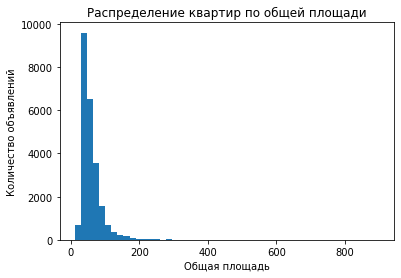

In [11]:
plt.hist(data['total_area'], bins=50)
plt.title("Распределение квартир по общей площади")
plt.xlabel("Общая площадь")
plt.ylabel("Количество объявлений")
plt.show()

функция округления

In [12]:
def my_round(number, step):
    if np.isnan(number):
        return number
    if step == 0:
        return number
    n = int(number/step)
    lb = n * step
    ub = (n+1) * step
    if number - lb > ub - number:
        return ub
    elif number - lb < ub - number:
        return lb
    return lb

ввели столбцы с округленными высотой потолков и площадью, чтобы при заполнении пропусков находить больше "похожих" квартир

In [13]:
print(len(data['total_area'].unique()))

data['total_area_rounded'] = data['total_area'].apply(lambda x: my_round(x, 0.5))

print(len(data['total_area_rounded'].unique()))

2182
502


Исправляем число этажей

In [14]:
def get_right_floors_total(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floors_total < floor:
        return floor
    return int(floors_total)

floors_total - заполняем медианой по квартирам с той же площадью

In [15]:
for area in data['total_area_rounded'].unique():
    if data.loc[data['total_area_rounded'] == area, 'floors_total'].count() > 1:
        median_value = data.loc[data['total_area_rounded'] == area, 'floors_total'].median()
        data.loc[data['total_area_rounded'] == area, 'floors_total'] = \
        data.loc[data['total_area_rounded'] == area, 'floors_total'].fillna(median_value)
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

проверка, что количество этажей не меньше текущего этажа и целое

In [16]:
data['floors_total'] = data.apply(get_right_floors_total, axis=1)

living_area - заполняем медианой по квартирам с той же общей площадью

In [17]:
for area in data['total_area_rounded'].unique():
    if data.loc[data['total_area_rounded'] == area, 'living_area'].count() > 1:
        median_value = data.loc[data['total_area_rounded'] == area, 'living_area'].median()
        data.loc[data['total_area_rounded'] == area, 'living_area'] = \
        data.loc[data['total_area_rounded'] == area, 'living_area'].fillna(median_value)

Остальное заполняем в соответствии с отношением суммы общих площадей квартир к сумме жилых площадей квартир

In [18]:
ratio = data.loc[~data['living_area'].isna(), 'living_area'].sum() / \
data.loc[~data['living_area'].isna(), 'total_area'].sum()
data.loc[data['living_area'].isna(), 'living_area'] = \
data.loc[data['living_area'].isna(), 'total_area'] * ratio

is_apartment - заполняем нулями. Т.е. если не указано - значит не апартаменты

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False)

kitchen_area - медианой по квартирам с той же общей площадью

In [20]:
for area in data['total_area_rounded'].unique():
    if data.loc[data['total_area_rounded'] == area, 'kitchen_area'].count() > 1:
        median_value = data.loc[data['total_area_rounded'] == area, 'kitchen_area'].median()
        data.loc[data['total_area_rounded'] == area, 'kitchen_area'] = \
        data.loc[data['total_area_rounded'] == area, 'kitchen_area'].fillna(median_value)


оставшиеся пропуски заполняем так: 

считаем отношение суммы площадей всех квартир и суммы площадей всех кухонь в соответствии с этим отношением рассчитываем kitchen_area

In [21]:
ratio = data.loc[~data['kitchen_area'].isna(), 'kitchen_area'].sum() / \
data.loc[~data['kitchen_area'].isna(), 'total_area'].sum()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = \
data.loc[data['kitchen_area'].isna(), 'total_area'] * ratio

balcony - если нет значения, значит нет и балкона

In [22]:
data['balcony'] = data['balcony'].fillna(0)

locality_name - никак не узнать, удаляем

In [23]:
data = data.dropna(subset=['locality_name'])

days_exposition - просто заполняем медианой сначала по площади, затем по региону и оставшиеся общей медианой

заполняем медианой по площади

In [24]:
for area in data['total_area_rounded'].unique():
    if data.loc[data['total_area_rounded'] == area, 'days_exposition'].count() > 1:
        median_value = data.loc[data['total_area_rounded'] == area, 'days_exposition'].median()
        data.loc[data['total_area_rounded'] == area, 'days_exposition'] = \
        data.loc[data['total_area_rounded'] == area, 'days_exposition'].fillna(median_value)

заполняем медианой по региону

In [25]:
for locality_name in data['locality_name'].unique():
    if data.loc[data['locality_name'] == locality_name, 'days_exposition'].count() > 1:
        median_value = data.loc[data['locality_name'] == locality_name, 'days_exposition'].median()
        data.loc[data['locality_name'] == locality_name, 'days_exposition'] = \
        data.loc[data['locality_name'] == locality_name, 'days_exposition'].fillna(median_value)

заполняем медианой по всем данным

In [26]:
data['days_exposition'] = \
data['days_exposition'].fillna(data['days_exposition'].median())

ceiling_height - заполняем медианой по площади, по региону, затем общей медианой

заполняем медианой по площади

In [27]:
for area in data['total_area_rounded'].unique():
    if data.loc[data['total_area_rounded'] == area, 'ceiling_height'].count() > 1:
        median_value = data.loc[data['total_area_rounded'] == area, 'ceiling_height'].median()
        data.loc[data['total_area_rounded'] == area, 'ceiling_height'] = \
        data.loc[data['total_area_rounded'] == area, 'ceiling_height'].fillna(median_value)

заполняем медианой по региону

In [28]:
for locality_name in data['locality_name'].unique():
    if data.loc[data['locality_name'] == locality_name, 'ceiling_height'].count() > 1:
        median_value = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
        data.loc[data['locality_name'] == locality_name, 'ceiling_height'] = \
        data.loc[data['locality_name'] == locality_name, 'ceiling_height'].fillna(median_value)
        

заполняем медианой по всем данным

In [29]:
data['ceiling_height'] = \
data['ceiling_height'].fillna(data['ceiling_height'].median())

Данные геосервисов заполняем средним по региону везде, кроме Санкт-Петербурга

In [30]:
remaining_columns_list = ['airports_nearest', 'cityCenters_nearest', 
                          'parks_around3000', 'parks_nearest', 
                         'ponds_around3000', 'ponds_nearest'
                         ]
for locality_name in data['locality_name'].unique():
    if locality_name != 'Санкт-Петербург':
        for column_name in remaining_columns_list:
            if data.loc[data['locality_name'] == locality_name, column_name].count() > 1:
                data.loc[data['locality_name'] == locality_name, column_name] = \
                (
                    data.loc[data['locality_name'] == locality_name, column_name]
                    .fillna(data.loc[data['locality_name'] == locality_name, column_name].median())
                )

for column_name in remaining_columns_list:
    data[column_name] = data[column_name].fillna(data[column_name].median())

Для Санкт петербурга удаляем строки с пропущенными данными геосервисов

In [31]:
for column_name in remaining_columns_list:
    data = data[~((data['locality_name'] == 'Санкт-Петербург') & (data[column_name].isna()))]

Зададим столбцам parks_around3000 и ponds_around3000 верное значение

Исключаем случай, где есть парк ближе 3000 м, но число таких парков 0

In [32]:
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'] <= 3000), 'parks_around3000'] = 1

Исключаем случай, где нет парка ближе 3000 м, но число таких парков > 0

In [33]:
data.loc[(data['parks_around3000'] != 0) & (data['parks_nearest'] > 3000), 'parks_around3000'] = 0

Исключаем случай, где есть водоем ближе 3000 м, но число таких водоемов 0

In [34]:
data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'] <= 3000), 'ponds_around3000'] = 1

Исключаем случай, где нет водоема ближе 3000 м, но число таких водоемов > 0

In [35]:
data.loc[(data['ponds_around3000'] != 0) & (data['ponds_nearest'] > 3000), 'ponds_around3000'] = 0

In [36]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
ceiling_height_nan      0
living_area_nan         0
kitchen_area_nan        0
total_area_rounded      0
dtype: int64

Из столбцов, в которых удалялись пропуски, они остались только в столбцах kitchen_area и living_area. Скорее всего, это квартиры с аномальными значениями total_area, которые отсеятся позднее.

Вывод о природе пропусков:
- ceiling_height - значения забыли занести в базу данных или потеряли информацию при использовании базы данных
- floors_total - информация потеряна
- living_area - не очень нужная информация, если знаем total_area
- is_apartment, balcony - не заполнили, т.к. равно False
- locality_name - информация потеряна
- остальные столбцы(информация о водоемах, аэропортах) - не была рассчитана или была потеряна
- days_exposition - информация потеряна

In [37]:
data['is_apartment'].unique()

array([False,  True])

Типы данных

first_day_exposition -> datetime64

In [38]:
data.loc[~data['first_day_exposition'].isna(), 'first_day_exposition'] = \
pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

floors_total -> int64

In [39]:
data['floors_total'] = data['floors_total'].astype('int')

is_apartment -> bool

In [40]:
data['is_apartment'] = data['is_apartment'].astype('bool')

balcony -> int64

In [41]:
data['balcony'] = data['balcony'].astype('int')

удаляем вспомогательную колонку

In [42]:
data = data.drop(['total_area_rounded'], axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Почему решил поменять:

first_day_exposition -> datetime64 - нужен читаемый формат даты и времени

floors_total -> int64 - может принимать только целые значения, лучше будет выглядеть в формате int64

is_apartment -> bool - варианты только True и False, а не строки 'True' и 'Flase'

balcony -> int64 - только целые значения

проверка наличия дубликатов

In [44]:
data.duplicated().sum()

0

Отсутствуют явные дупликаты

Устранение неявных дубликатов

In [45]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Функция, возвращающая индекс первой заглавной буквы в строке

In [46]:
def find_first_upper(stroka):
    for i, liter in enumerate(stroka):
        if liter.isupper():
            return i
    return -1

Функция, возвращающая ключевую часть названия(начиная с первой заглавной буквы)

In [47]:
def get_key_part(stroka):
    first_upper_literal = find_first_upper(stroka)
    key_part = stroka[first_upper_literal:]
    return key_part

Функция, возвращающая правильное назание региона по названию из датафрейма

In [48]:
def get_locality_name(name, locality_names_dict):
    key_part = get_key_part(name)
    return locality_names_dict[key_part][0]

Для каждого названия региона находим ключевую часть в названии - начиная с первой заглавной буквы. Группируем названия по ключевой части.

In [49]:
locality_names = data['locality_name'].unique()
locality_names_dict = {}
for name in locality_names:
    key_part = get_key_part(name)
    if key_part not in locality_names_dict.keys():
        locality_names_dict[key_part] = []
    locality_names_dict[key_part].append(name)
for key_part in locality_names_dict.keys():
    print(locality_names_dict[key_part])

['Санкт-Петербург']
['посёлок Шушары']
['городской посёлок Янино-1', 'городской поселок Янино-1']
['посёлок Парголово']
['посёлок Мурино', 'поселок Мурино', 'Мурино']
['Ломоносов']
['Сертолово']
['Петергоф']
['Пушкин']
['деревня Кудрово', 'Кудрово']
['Коммунар']
['Колпино']
['поселок городского типа Красный Бор', 'посёлок городского типа Красный Бор']
['Гатчина']
['деревня Фёдоровское', 'городской посёлок Фёдоровское']
['Выборг']
['Кронштадт']
['Кировск']
['деревня Новое Девяткино']
['посёлок Металлострой']
['посёлок городского типа Лебяжье', 'поселок городского типа Лебяжье']
['посёлок городского типа Сиверский']
['поселок Молодцово']
['поселок городского типа Кузьмоловский', 'посёлок городского типа Кузьмоловский']
['садовое товарищество Новая Ропша']
['Павловск']
['деревня Пикколово']
['Всеволожск']
['Волхов']
['Кингисепп']
['Приозерск']
['Сестрорецк']
['деревня Куттузи']
['посёлок Аннино', 'поселок Аннино']
['поселок городского типа Ефимовский']
['посёлок Плодовое']
['деревня Закли

Подсчитываем количество списко длины > 1 в полученном словаре, т.е. количество названий с неявными дупликатами

In [50]:
count = 0
for key_part in locality_names_dict.keys():
    if len(locality_names_dict[key_part]) > 1: 
        count += 1
print("Названий с неявными дубликатами:", count)

Названий с неявными дубликатами: 55


Каждое название заменяем на первый элемент списка похожих названий

In [51]:
data['locality_name'] = (
    data['locality_name']
    .apply(lambda x: get_locality_name(x, locality_names_dict))
)

Пересчитываем словарь

In [52]:
locality_names = data['locality_name'].unique()
locality_names_dict = {}
for name in locality_names:
    key_part = get_key_part(name)
    if key_part not in locality_names_dict.keys():
        locality_names_dict[key_part] = []
    locality_names_dict[key_part].append(name)

In [53]:
count = 0
for key_part in locality_names_dict.keys():
    if len(locality_names_dict[key_part]) > 1: 
        count += 1
print("Названий с неявными дубликатами:", count)

Названий с неявными дубликатами: 0


В ходе предобработки данных были выполнены следующие шаги:
1. Были заполнены пропущенные значения. Пропуски в количественных значениях - медианой, в качественных - наиболее представленных значением или специальным словом.
2. Были изменены типы данных в столбцах first_day_exposition -> datetime64, floors_total -> int64, is_apartment -> bool, balcony -> int64
3. Были удалены неявные дубликаты в столбце locality_name

### Добавьте в таблицу новые столбцы

Функция, возвращающая тип этажа по номеру этажа и общему числу этажей

In [54]:
def get_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

добавление новых столбцов

one_square_meter_price - цена одного квадратного метра

week_day_exposition - день недели публикации объявления

month_exposition - месяц публикации объявления

year_exposition - год публикации объявления

floor_type - тип этажа квартиры

cityCenters_nearest_km - расстояние до центра города в километрах

In [55]:
data['one_square_meter_price'] = data['last_price'] / data['total_area']

data['week_day_exposition'] = data['first_day_exposition'].apply(lambda x: x.weekday())

data['month_exposition'] = data['first_day_exposition'].apply(lambda x: x.month)

data['year_exposition'] = data['first_day_exposition'].apply(lambda x: x.year)

data['floor_type'] = data.apply(get_floor_type, axis=1)

data['cityCenters_nearest_km'] = (
    data['cityCenters_nearest']
    .apply(lambda x: round(x / 1000))
)

In [56]:
list_columns = ['last_price', 'total_area', 'one_square_meter_price',
                'first_day_exposition', 'week_day_exposition', 'month_exposition', 'year_exposition',
                'floors_total', 'floor', 'floor_type',
                'cityCenters_nearest', 'cityCenters_nearest_km']
data.loc[:, list_columns].head(20)

,last_price,total_area,one_square_meter_price,first_day_exposition,week_day_exposition,month_exposition,year_exposition,floors_total,floor,floor_type,cityCenters_nearest,cityCenters_nearest_km
0,"13,000,000.0",108.0,"120,370.4",2019-03-07,3,3,2019,16,8,другой,"16,028.0",16
1,"3,350,000.0",40.4,"82,920.8",2018-12-04,1,12,2018,11,1,первый,"18,603.0",19
2,"5,196,000.0",56.0,"92,785.7",2015-08-20,3,8,2015,5,4,другой,"13,933.0",14
3,"64,900,000.0",159.0,"408,176.1",2015-07-24,4,7,2015,14,9,другой,"6,800.0",7
4,"10,000,000.0",100.0,"100,000.0",2018-06-19,1,6,2018,14,13,другой,"8,098.0",8
5,"2,890,000.0",30.4,"95,065.8",2018-09-10,0,9,2018,12,5,другой,"13,119.0",13
6,"3,700,000.0",37.3,"99,195.7",2017-11-02,3,11,2017,26,6,другой,"19,143.0",19
7,"7,915,000.0",71.6,"110,544.7",2019-04-18,3,4,2019,24,22,другой,"11,634.0",12
8,"2,900,000.0",33.2,"87,454.8",2018-05-23,2,5,2018,27,26,другой,"13,119.0",13
9,"5,400,000.0",61.0,"88,524.6",2017-02-26,6,2,2017,9,7,другой,"15,008.0",15


### Проведите исследовательский анализ данных

In [57]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,week_day_exposition,month_exposition,year_exposition,cityCenters_nearest_km
count,"23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0",...,"23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0","23,650.0"
mean,9.9,"6,541,126.9",60.3,2.1,2.7,10.7,34.6,5.9,10.5,0.6,...,1.1,459.1,1.2,511.3,171.6,"99,432.2",2.6,6.4,"2,017.4",13.9
std,5.7,"10,896,399.2",35.7,1.1,1.0,6.6,22.5,4.9,5.9,1.0,...,0.4,204.7,0.5,175.5,207.3,"50,337.9",1.8,3.5,1.0,7.6
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,...,0.0,1.0,1.0,13.0,1.0,111.8,0.0,1.0,"2,014.0",0.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,...,1.0,439.0,1.0,509.0,45.0,"76,615.0",1.0,3.0,"2,017.0",11.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.0,0.0,...,1.0,439.0,1.0,509.0,94.5,"95,000.0",3.0,6.0,"2,017.0",13.0
75%,14.0,"6,799,000.0",69.7,3.0,2.8,16.0,42.3,8.0,11.8,1.0,...,1.0,439.0,1.0,509.0,205.0,"114,274.2",4.0,10.0,"2,018.0",15.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,...,3.0,"3,190.0",3.0,"1,344.0","1,580.0","1,907,500.0",6.0,12.0,"2,019.0",66.0


Построение гистограмм для каждого из параметров с удалением выбросов или их заменой на реальные значения

total_area, living_area, kitchen_area

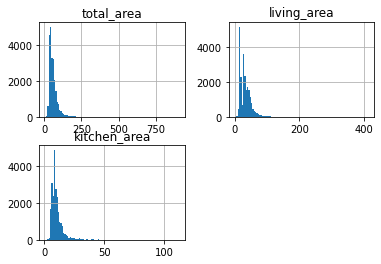

In [58]:
data[['total_area', 'living_area', 'kitchen_area']].hist(bins=100);

Выбрали квартиры с общей площадью более 250 кв. м., отсортировали значения по убыванию общей площади вывели площади: общую, жилую и кухни, а также количество комнат и индикаторы - были ли площади рассчитаны как медианы или изначально были в таблице

In [59]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data.loc[data['total_area'] > 250].sort_values(by='total_area', ascending=False)[['total_area', 'living_area', 'kitchen_area', 'rooms',  'living_area_nan', 'kitchen_area_nan']])

,total_area,living_area,kitchen_area,rooms,living_area_nan,kitchen_area_nan
19540,900.0,409.7,112.0,12,False,False
12859,631.2,322.3,19.5,7,False,False
3117,631.0,362.2,60.0,7,True,False
15651,618.0,258.0,70.0,7,False,False
5358,590.0,409.0,100.0,15,False,False
4237,517.0,332.0,22.0,7,False,False
8018,507.0,301.5,45.5,5,False,False
15016,500.0,287.0,86.7,4,True,True
5893,500.0,287.0,40.0,6,True,False
12401,495.0,347.5,25.0,7,False,False


Проанализировав данные о квартирах с общей площадью свыше 250 кв.м. нельзя сделать очевидных выводов. Примеры:
1. id = 19540, 900 кв.м., 410 жилая площадь, 112 кухня, 12 комнат. Довольно мало комнат для такой большой площади, но ошибки на порядок тут точно нет.
2. id = 6183, 363 208 31 - площади. Нереалистично большая площадь для 3 комнат. Но опять же ошибки на порядок быть не может. 36 метров - слишком малая площадь для трёх комнат.
Есть очевидно ошибочные строки с id = 9826 и 19392, где на 494 и 371 кв. м. приходится всего 1 и 0 комнат соответственно.
Вывод: оставляем квартиры большой площади в датасете, удалив только 2 заведомо ошибочных строки

Удаление нереалистичных значений

In [60]:
data.drop([9826, 19392], inplace=True)

#### Удаление выбросов и редких значений

##### Финальная цена

In [61]:
import matplotlib.pyplot as plt

Гистограмма распределения цены 

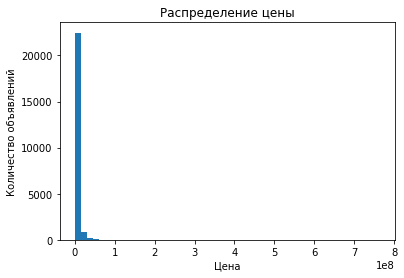

In [62]:
plt.hist(data['last_price'], bins=50)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

Данные по квартирам с ценами свыше 100 млн. руб.

Можем рассмотреть все строчки отдельно, их не очень много

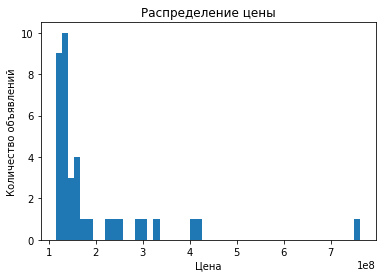

In [63]:
plt.hist(data.loc[data['last_price'] > 100000000, 'last_price'], bins=50)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

видим, что наиболее представлены квартиры с ценами до 20 млн.руб

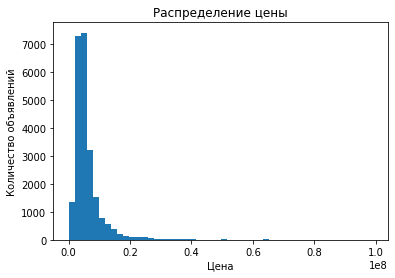

In [64]:
plt.hist(data.loc[data['last_price'] < 100000000, 'last_price'], bins=50)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

квартиры с ценами свыше 100 млн. руб.

In [65]:
current_data = data.loc[data['last_price'] > 100000000, \
                    ['rooms', 'last_price', 'total_area', 'cityCenters_nearest_km']]
display(current_data.sort_values(by='last_price', ascending=True))

,rooms,last_price,total_area,cityCenters_nearest_km
21923,5,"115,490,000.0",235.0,1
1188,6,"118,000,000.0",290.6,6
20264,4,"119,000,000.0",187.6,6
1300,5,"120,000,000.0",280.0,4
16647,3,"122,000,000.0",145.0,7
4996,4,"124,000,000.0",124.5,2
21023,4,"124,350,000.0",248.7,2
20349,4,"124,480,000.0",267.7,7
1928,4,"125,000,000.0",224.5,2
21955,7,"130,000,000.0",431.0,13


Сложно сказать, какие из этих объявлений содержат ошибки. Такие цены за квартиру, расположенную близко к центру города, вполне реальны.

Данные по квартирам с ценами ниже 20 млн. руб.

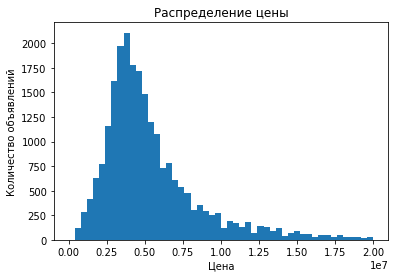

In [66]:
plt.hist(data.loc[data['last_price'] < 20000000, 'last_price'], bins=50)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

Данные по квартирам с ценами ниже 200 тыс. руб.

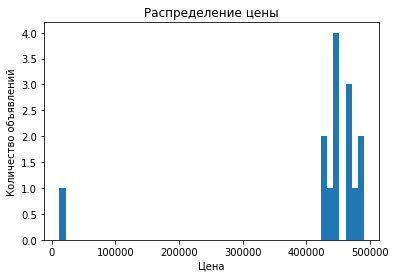

In [67]:
plt.hist(data.loc[data['last_price'] < 500000, 'last_price'], bins=50)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

In [68]:
data.loc[(data['last_price'] < 500000) & (data['locality_name'] != 'Санкт-Петербург'), ['total_area', 'last_price', 'is_apartment', 'locality_name', 'rooms', 'cityCenters_nearest_km']]

,total_area,last_price,is_apartment,locality_name,rooms,cityCenters_nearest_km
5698,42.0,"450,000.0",False,городской посёлок Будогощь,2,13
6859,40.0,"490,000.0",False,деревня Старополье,1,13
9581,43.4,"450,000.0",False,деревня Старополье,2,13
10782,29.1,"490,000.0",False,Сланцы,1,13
14911,54.0,"430,000.0",False,посёлок станции Свирь,2,13
16032,32.0,"480,000.0",False,Сланцы,1,13
16219,38.5,"450,000.0",False,деревня Вахнова Кара,2,13
16274,40.0,"440,000.0",False,деревня Старополье,1,13
17456,30.4,"430,000.0",False,Сланцы,1,13
17676,36.5,"450,000.0",False,деревня Ям-Тесово,1,13


Это данные по разным населенным пунктам (при удалении не потеряем чего-то специфичного), их мало.

In [69]:
display(data.loc[(data['last_price'] < 2000000) & (data['locality_name'] == 'Санкт-Петербург'), ['total_area', 'last_price', 'is_apartment', 'locality_name', 'rooms', 'cityCenters_nearest_km']])

,total_area,last_price,is_apartment,locality_name,rooms,cityCenters_nearest_km
4248,49.1,"1,200,000.0",False,Санкт-Петербург,4,12
8755,18.8,"1,350,000.0",False,Санкт-Петербург,0,14
8793,109.0,"12,190.0",False,Санкт-Петербург,2,9
10208,17.0,"1,900,000.0",False,Санкт-Петербург,1,6
12996,18.0,"1,900,000.0",False,Санкт-Петербург,0,16
14153,23.2,"1,995,000.0",False,Санкт-Петербург,1,12
14862,37.9,"1,704,062.0",False,Санкт-Петербург,1,18
16136,41.0,"1,900,000.0",False,Санкт-Петербург,2,15
16949,15.0,"1,550,000.0",False,Санкт-Петербург,1,16
17326,25.0,"1,846,648.0",False,Санкт-Петербург,1,17


Тоже довольно разнообразные объявления, удаляем.

Очень странно, что имеются объявления с ценами ниже 100000 рублей. Скорее всего, это объявления об аренде, которые почему-то попали в раздел продажи жилья. Минимальная цена для жилья в Санкт-Петербурге составляет примерно 2 млн. руб. (На сайте Яндекс Недвижимости нашлось только 2 объявления о продаже квартиры дешевле 2 млн.руб.)

В области минимальная цена квартир начинается с 500 тыс. руб. (7 объявлений с ценой ниже)

Объявления с ценой более 50 млн. руб.

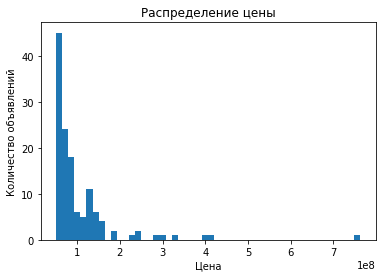

In [70]:
plt.hist(data.loc[data['last_price'] > 50000000, 'last_price'], bins=50)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

Видим, что квартир с ценами выше 150 млн. руб. примерно 10-15. Их и обрежем.

In [71]:
display(data['last_price'] > 150000000)

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: last_price, Length: 23648, dtype: bool

Удаляем объявления о продаже квартир, чья цена ниже 2 млн. руб. в Санкт-Петербурге

In [72]:
data = data[~((data['last_price'] <= 2000000) & (data['locality_name'] == 'Санкт-Петербург'))]

Удаляем объявления о продаже квартир, чья цена ниже 0.5 млн. руб. вне Санкт-Петербурга

In [73]:
data = data[~((data['last_price'] <= 500000) & (data['locality_name'] != 'Санкт-Петербург'))]

Удаляем объявления о продаже квартир, чья цена выше 150 млн. руб.

In [74]:
data = data[data['last_price'] < 15000000]

Проверка

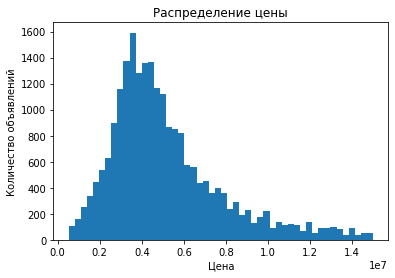

In [75]:
plt.hist(data.loc[:, 'last_price'], bins=50)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.show()

##### Число комнат

Гистограмма распределения количества комнат

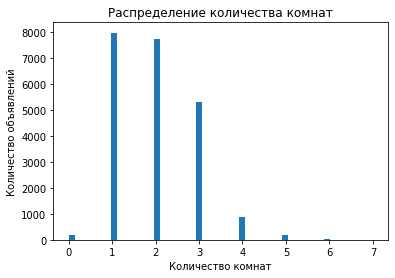

In [76]:
plt.hist(data['rooms'], bins=50)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

Объявления с числом комнат более 6

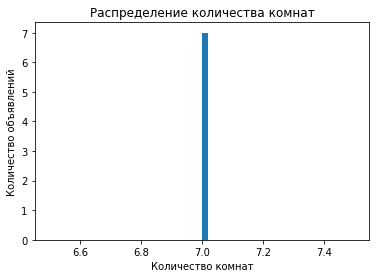

In [77]:
plt.hist(data.loc[data['rooms'] > 6, 'rooms'], bins=50)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

In [78]:
display(data.loc[data['rooms'] > 6, ['total_area', 'last_price', 'is_apartment', 'locality_name', 'rooms', 'cityCenters_nearest_km']])

,total_area,last_price,is_apartment,locality_name,rooms,cityCenters_nearest_km
2039,162.8,"13,520,000.0",False,Санкт-Петербург,7,2
2462,201.5,"7,900,000.0",False,посёлок Парголово,7,21
3545,154.4,"13,700,000.0",False,Санкт-Петербург,7,4
9889,191.0,"12,990,000.0",False,Санкт-Петербург,7,6
13736,203.0,"14,990,000.0",False,Санкт-Петербург,7,5
14603,100.6,"13,490,000.0",True,Санкт-Петербург,7,4
17991,125.0,"12,000,000.0",False,Санкт-Петербург,7,5


Эти не ошибки, цена вполне соотносится с количеством комнат

Можем видеть, что есть квартиры с 0 комнат, которые мы удалим. Также удалим квартиры с количеством комнат более 10. Таких квартир всего 10. (Раньше такие были, сейчас удалились на предыдущих этапах)

удаляем объявления о квартирах с числом комнат равным 0 или большим либо равным 10.

In [79]:
data = data[(data['rooms'] > 0) & (data['rooms'] < 10)]

Гистограмма для проверки

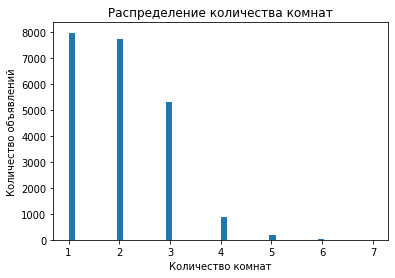

In [80]:
plt.hist(data['rooms'], bins=50)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

##### Высота потолков

Гистограмма распределения высоты потолков

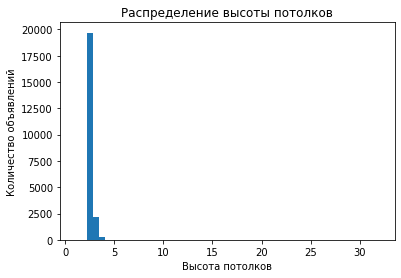

In [81]:
plt.hist(data['ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Видим 2 пика - около 5 и 25 метров

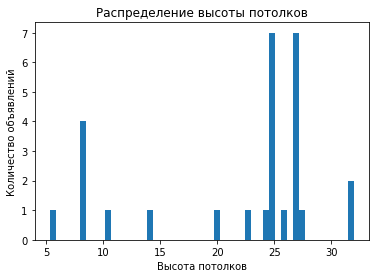

In [82]:
plt.hist(data.loc[data['ceiling_height'] > 5, 'ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Приемлемые значения высоты потолков

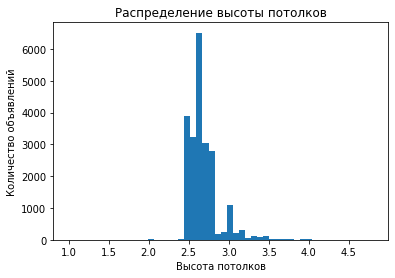

In [83]:
plt.hist(data.loc[data['ceiling_height'] < 5, 'ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Странные значения высоты потолков, причём их очень мало. Будем считать, что такие объявления оишбочны.

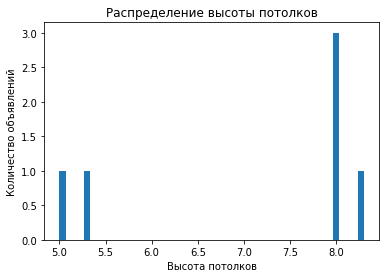

In [84]:
plt.hist(data.loc[(data['ceiling_height'] >= 5) & (data['ceiling_height'] < 10), 'ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Всего 2 объявления с высотой от 10 до 15 метров. Ошибки на порядок нет, значит это ошибка.

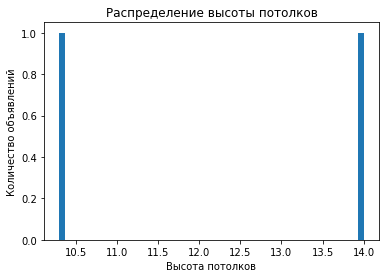

In [85]:
plt.hist(data.loc[(data['ceiling_height'] >= 10) & (data['ceiling_height'] < 15), 'ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Таких объявлений нет

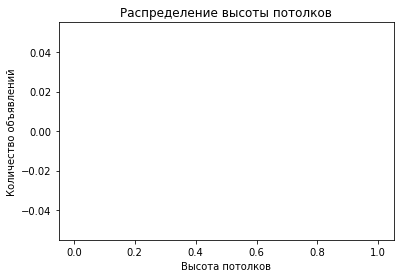

In [86]:
plt.hist(data.loc[(data['ceiling_height'] >= 15) & (data['ceiling_height'] < 20), 'ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Наиболее вероятно, что в этих объявлениях имеется ошибка на порядок. Уменьшаем высоту потолков в 10 раз.

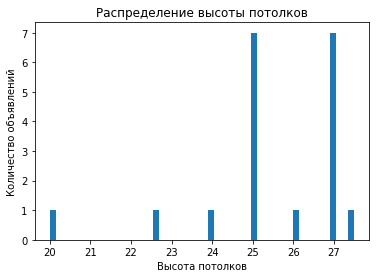

In [87]:
plt.hist(data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] < 30), 'ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Аналогично, уменьшаем в 10 раз.

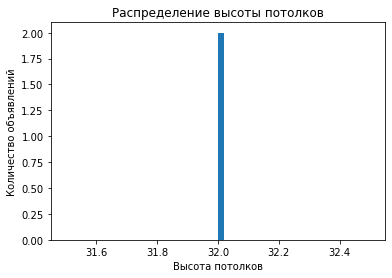

In [88]:
plt.hist(data.loc[(data['ceiling_height'] >= 30) & (data['ceiling_height'] < 40), 'ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Квартиры с высотой потолков от 5 до 15 метров удаляем

In [89]:
data = data[~((data['ceiling_height'] > 5 ) & (data['ceiling_height'] < 20))]

Для квартир с высотой потолков от 20 до 40 метров уменьшаем высоту в 10 раз

In [90]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] < 40), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] < 40), 'ceiling_height'] / 10

Гистограмма для проверки

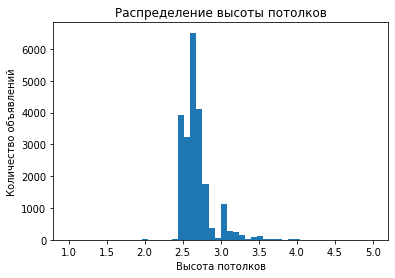

In [91]:
plt.hist(data.loc[:, 'ceiling_height'], bins=50)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

##### Тип этажа

Распределение типов этажей

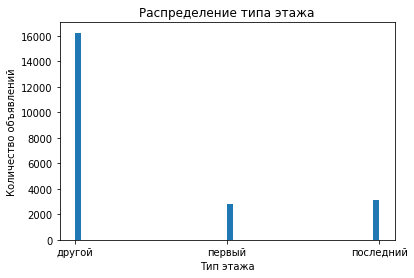

In [92]:
plt.hist(data['floor_type'], bins=50)
plt.title('Распределение типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.show()

проверка правильности значений в столбце floor_type

In [93]:
data.loc[data['floor_type'] == 'другой', ['floor', 'floors_total','floor_type']].head(10)

,floor,floors_total,floor_type
0,8,16,другой
2,4,5,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой
10,3,12,другой
11,4,5,другой


проверка правильности значений в столбце floor_type

In [94]:
data.loc[data['floor_type'] == 'первый', ['floor', 'floors_total','floor_type']].head(10)

,floor,floors_total,floor_type
1,1,11,первый
14,1,6,первый
16,1,5,первый
24,1,3,первый
28,1,6,первый
37,1,5,первый
68,1,5,первый
70,1,5,первый
73,1,10,первый
76,1,5,первый


Столбец заполнялся автоматически, ошибок быть не должно. Примерно таким и должно быть распределение значений.

##### Число этажей в доме

Гистограмма распределения числа этажей в доме

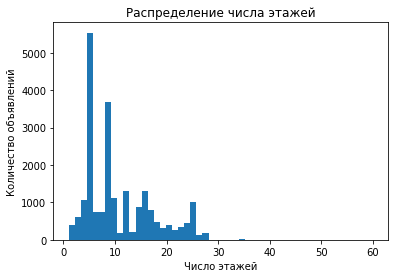

In [95]:
plt.hist(data['floors_total'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

Объявления с числом этажей менее 5

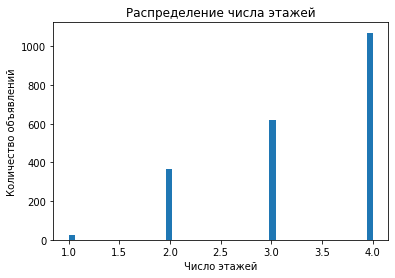

In [96]:
plt.hist(data.loc[data['floors_total'] < 5, 'floors_total'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

Объявления с числом этажей более 25

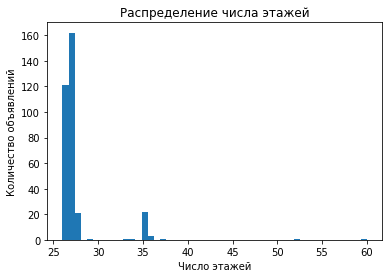

In [97]:
plt.hist(data.loc[data['floors_total'] > 25, 'floors_total'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

Объявления с числом этажей более 35

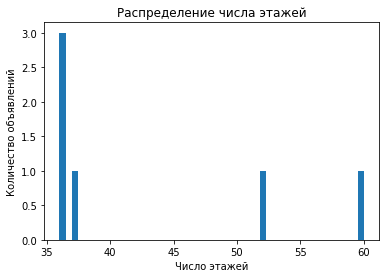

In [98]:
plt.hist(data.loc[data['floors_total'] > 35, 'floors_total'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

На сайте Яндекс.Недвижимости я не нашёл ни одной квартиры в более чем 35-этажном доме. Будем считать объявления с общим числом этажей, большим 35, ошибочными.

Убираем выбросы

In [99]:
data = data[data['floors_total'] <= 35]

Гистограмма для проверки

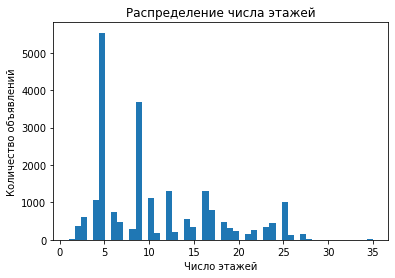

In [100]:
plt.hist(data['floors_total'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

##### Расстояние до центра города

Гистограмма распределения расстояния до центра города

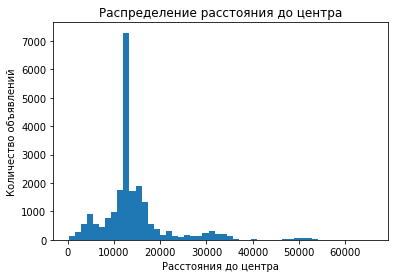

In [101]:
plt.hist(data['cityCenters_nearest'], bins=50)
plt.title('Распределение расстояния до центра')
plt.xlabel('Расстояния до центра')
plt.ylabel('Количество объявлений')
plt.show()

Объявления с расстоянием до ближайшего центра меньше 1000 м

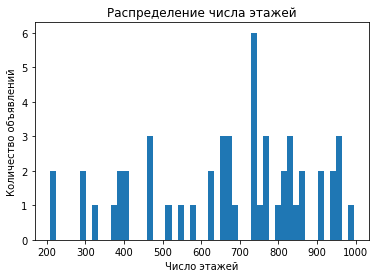

In [102]:
plt.hist(data.loc[data['cityCenters_nearest'] < 1000, 'cityCenters_nearest'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

Объявления с расстоянием до ближайшего центра более 35 км

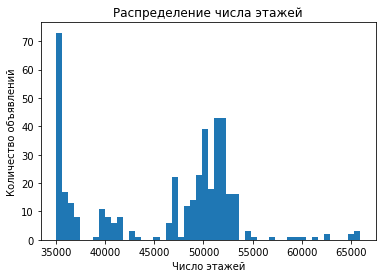

In [103]:
plt.hist(data.loc[data['cityCenters_nearest'] > 35000, 'cityCenters_nearest'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

Объявления с расстоянием до ближайшего центра более 54 км, считаем это выбросами, т.к. очень мало данных для таких расстояний

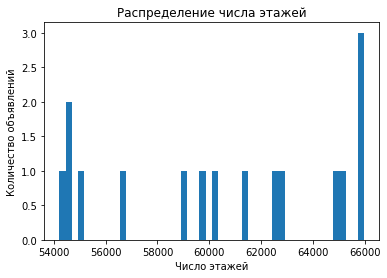

In [104]:
plt.hist(data.loc[data['cityCenters_nearest'] > 54000, 'cityCenters_nearest'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

удаляем редкие значения

In [105]:
data = data[data['cityCenters_nearest'] <= 54000]

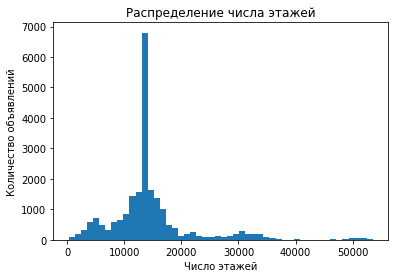

In [106]:
plt.hist(data['cityCenters_nearest'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

##### Расстояние до ближайшего парка

Гистограмма распределения расстояния до ближайшего парка

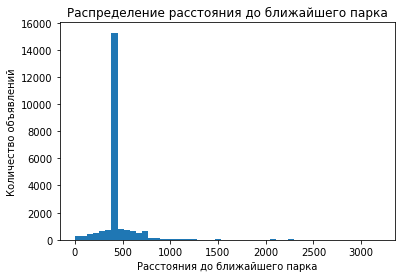

In [107]:
plt.hist(data['parks_nearest'], bins=50)
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояния до ближайшего парка')
plt.ylabel('Количество объявлений')
plt.show()

Объявления, у которых расстояние до ближайшего парка меньше 150 м

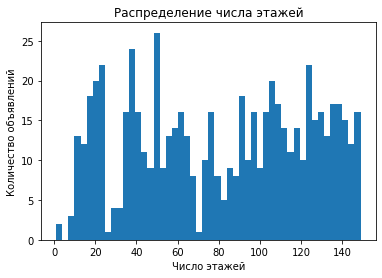

In [108]:
plt.hist(data.loc[data['parks_nearest'] < 150 , 'parks_nearest'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

Будем считать, что значения расстояния до парка, меньшие 25 м - ошибочны. Сложно представить квартиру, которая находится так близко к парку.

Объявления, у которых расстояние до ближайшего парка больше 1 км

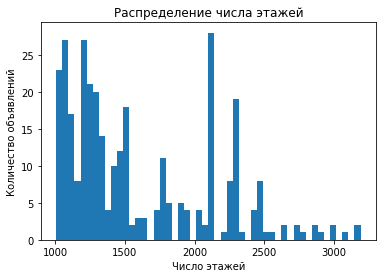

In [109]:
plt.hist(data.loc[data['parks_nearest'] > 1000 , 'parks_nearest'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

гистограмма для проверки

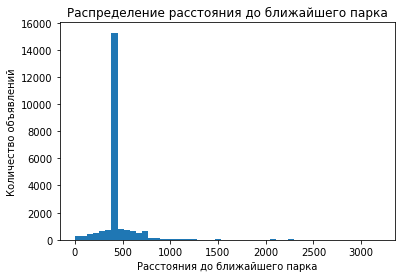

In [110]:
plt.hist(data['parks_nearest'], bins=50)
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояния до ближайшего парка')
plt.ylabel('Количество объявлений')
plt.show()

#### Как быстро продавались квартиры (days_exposition)

гистограмма времени размещения объвяления

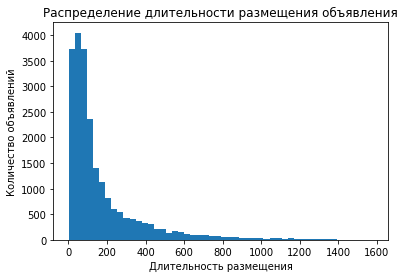

In [111]:
plt.hist(data['days_exposition'], bins=50)
plt.title('Распределение длительности размещения объявления')
plt.xlabel('Длительность размещения')
plt.ylabel('Количество объявлений')
plt.show()

Среднее и медиана

In [112]:
print('Среднее значение =', data['days_exposition'].mean())
print('Медиана =', data['days_exposition'].median())

Среднее значение = 167.2922347629797
Медиана = 92.0


Можем считать значения больше 95%-й квантили - долгими

In [113]:
data['days_exposition'].quantile(.95)

594.0

Будем считать значения меньше 5%-й квантили - быстрыми

In [114]:
data['days_exposition'].quantile(.05)

10.0

Обычно продажа занимает от 3 месяцев до полугода. Быстрыми считаем квартиры, проданные быстрее, чем за 10 дней. Долгими - дольше, чем за 610 дней (т.е. за 20 месяцев).

#### Исследование зависимости стоимости объекта от
- общей площади
- жилой площади
- плошади кухни
- количества комнат
- этажа, на котором расположена квартира
- даты размещения


Функция, возвращающая категорию

Принимает на вход строку датафрейма, имя столбца и словарь с категориями

In [115]:
def get_category(row, column, category_dict):
    variable = row[column]
    for pare in category_dict.items():
        category_name = pare[0]
        category_limits = pare[1]
        if category_limits[0] <= variable < category_limits[1]:
            return category_name
    return None

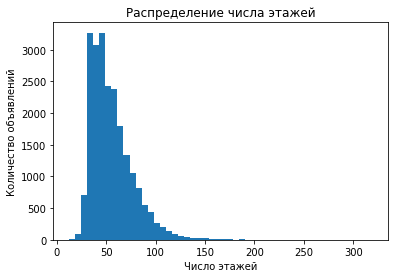

In [116]:
plt.hist(data['total_area'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

словарь для категорий общей площади

In [117]:
total_area_categories = {
    'A': [400, 700],
    'B': [250, 400],
    'C': [150, 250],
    'D': [100, 150],
    'F': [70, 100], 
    'G': [55, 70],
    'H': [40, 55],
    'I': [25, 40], 
    'J': [10, 25],
    'K': [0, 10]
}

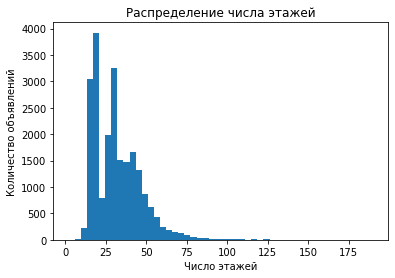

In [118]:
plt.hist(data['living_area'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

словарь для категорий жилой площади

In [119]:
living_area_categories = {
    'A': [200, 400],
    'B': [120, 200],
    'C': [90, 120],
    'D': [70, 90],
    'F': [55, 70], 
    'G': [40, 55],
    'H': [25, 40],
    'I': [10, 25], 
    'J': [0, 10]
}

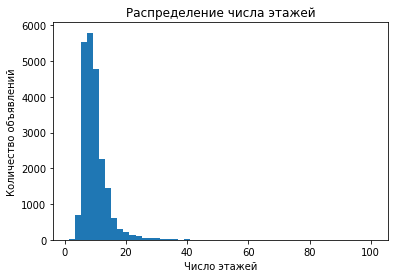

In [120]:
plt.hist(data['kitchen_area'], bins=50)
plt.title('Распределение числа этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество объявлений')
plt.show()

словарь для категорий плошади кухни

In [121]:
kitchen_area_categories = {
    'A': [60, 120],
    'B': [40, 60],
    'C': [25, 40],
    'D': [20, 25],
    'F': [15, 20], 
    'G': [10, 15],
    'H': [5, 10],
    'I': [0, 5]
}

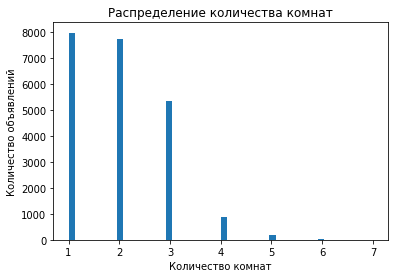

In [122]:
plt.hist(data['rooms'], bins=50)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

словарь для категорий количества комнат

In [123]:
rooms_categories = {
    'A': [6, 10],
    'B': [4, 5],
    'C': [3, 4],
    'D': [2, 3],
    'F': [1, 2], 
    'G': [0, 1]
}

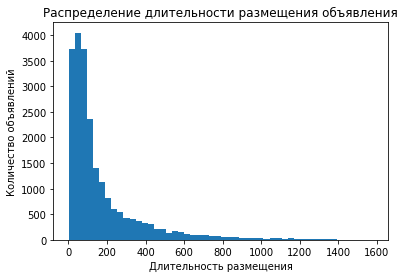

In [124]:
plt.hist(data['days_exposition'], bins=50)
plt.title('Распределение длительности размещения объявления')
plt.xlabel('Длительность размещения')
plt.ylabel('Количество объявлений')
plt.show()

Квантили длительности размещения для выбора категорий

In [125]:
print(data['days_exposition'].quantile(.90))
print(data['days_exposition'].quantile(.75))
print(data['days_exposition'].quantile(.60))
print(data['days_exposition'].quantile(.50))
print(data['days_exposition'].quantile(.40))
print(data['days_exposition'].quantile(.25))
print(data['days_exposition'].quantile(.10))

418.0
198.0
117.0
92.0
74.5
45.00000000000001
19.0


словарь для категорий длительности размещения

In [126]:
days_exposition_categories = {
    'A': [431, 1700],
    'B': [209, 431],
    'C': [123, 209],
    'D': [95, 123],
    'F': [77, 95], 
    'G': [46, 77],
    'H': [19, 46],
    'I': [0, 19]
}

Заполнение столбцов с категориями

In [127]:
data['total_area_category'] = (data
                           .apply(lambda x:\
                            get_category(x, \
                            'total_area', \
                             total_area_categories), axis=1))
data['living_area_category'] = (data
                           .apply(lambda x:\
                            get_category(x, \
                            'living_area',\
                            living_area_categories), axis=1))
data['kitchen_area_category'] = (data
                           .apply(lambda x:\
                            get_category(x, \
                            'kitchen_area',\
                            kitchen_area_categories), axis=1))
data['rooms_category'] = (data
                           .apply(lambda x:\
                            get_category(x, \
                            'rooms', \
                            rooms_categories), axis=1))
data['days_exposition_category'] = (data
                           .apply(lambda x:\
                            get_category(x, \
                            'days_exposition',\
                            days_exposition_categories), axis=1))

##### От общей площади

средняя цена и количество объявлений для каждой из категорий общей площади

In [128]:
data.groupby(by='total_area_category')['last_price'].agg(['mean', 'count'])

,mean,count
total_area_category,,
B,"13,825,000.0",4
C,"12,679,650.8",79
D,"10,849,105.4",810
F,"7,788,798.4",3780
G,"5,577,573.5",4879
H,"4,205,008.2",7097
I,"3,319,050.3",5380
J,"2,411,571.5",121


график зависимости цены от общей площади

<AxesSubplot:xlabel='total_area'>

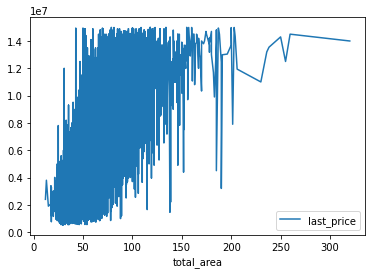

In [129]:
(data
 .sort_values(by='total_area', ascending=True)
 .plot(x='total_area', y='last_price', style = '-')
      )

матрица корреляций

In [130]:
data['last_price'].corr(data['total_area'])

0.741979732220226

Как из графика, так и из среднего по категориям можем видеть, что с ростом площади квартиры растет и цена. То есть зависимость есть.

##### От жилой площади

средния цена и количество объявлений для каждой из категорий жилой площади

In [131]:
data.groupby(by='living_area_category')['last_price'].agg(['mean', 'count'])

,mean,count
living_area_category,,
B,"13,361,666.7",21
C,"12,059,211.5",106
D,"10,582,427.7",325
F,"9,339,508.2",991
G,"6,633,407.9",4408
H,"4,954,373.9",8277
I,"3,735,284.9",7999
J,"4,829,100.2",23


график зависимости цены от жилой площади

<AxesSubplot:xlabel='living_area'>

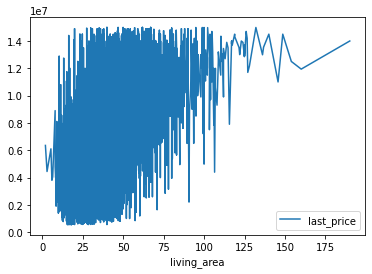

In [132]:
(data
 .sort_values(by='living_area', ascending=True)
 .plot(x='living_area', y='last_price', style = '-')
      )

матрица корреляций

In [133]:
data['living_area'].corr(data['total_area'])

0.9251026087992732

Те же выводы, что и для общей площади. Можем видеть зависимость цены от жилой площади, чем больше площадь, тем больше цена.

##### От площади кухни

средния цена и количество объявлений для каждой из категорий площади кухни

In [134]:
data.groupby(by='kitchen_area_category')['last_price'].agg(['mean', 'count'])

,mean,count
kitchen_area_category,,
A,"11,447,500.0",4
B,"11,274,000.0",22
C,"9,843,986.0",239
D,"8,844,447.3",366
F,"8,196,790.4",1330
G,"6,099,563.5",7221
H,"4,149,394.5",12834
I,"3,037,563.5",134


график зависимости цены от площади кухни

<AxesSubplot:xlabel='kitchen_area'>

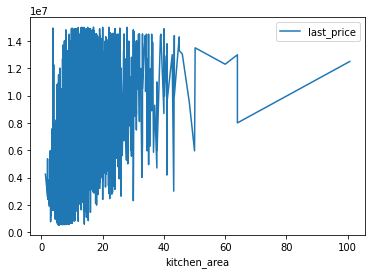

In [135]:
(data
 .sort_values(by='kitchen_area', ascending=True)
 .plot(x='kitchen_area', y='last_price', style = '-')
      )

матрица корреляций

In [136]:
data['kitchen_area'].corr(data['total_area'])

0.5052988936176348

Так же прямая зависимость цены от площади кухни.

##### От числа комнат

средняя цена квартиры и количество объявлений для разного числа комнат

In [137]:
data.groupby(by='rooms')['last_price'].agg(['mean', 'count'])

,mean,count
rooms,,
1,"3,787,294.0",7979
2,"5,186,832.2",7729
3,"6,540,876.9",5331
4,"7,857,051.2",884
5,"10,105,032.8",183
6,"11,619,918.9",37
7,"12,655,714.3",7


Если рассматривать только наиболее представленное число комнат, т.е. от 1 до 7, то можем видеть одновременный рост средней цены квартиры и числа комнат.

In [138]:
#средняя цена квартиры и количество объявлений для разных категорий комнат
data.groupby(by='rooms_category')['last_price'].agg(['mean', 'count'])

,mean,count
rooms_category,,
A,"11,784,704.5",44
B,"7,857,051.2",884
C,"6,540,876.9",5331
D,"5,186,832.2",7729
F,"3,787,294.0",7979


матрица корреляций

In [139]:
data['rooms'].corr(data['total_area'])

0.7972630688575691

Аналогичный вывод можем сделать и для категорий комнат

##### От типа этажа

средняя цена для разных типов этажей

In [140]:
data.groupby(by='floor_type')['last_price'].agg(['mean', 'count'])

,mean,count
floor_type,,
другой,"5,386,255.1",16231
первый,"4,284,374.3",2804
последний,"4,832,407.2",3115


Разница в средней цене не очень большая, и не очевидны причины, почему должна меняться цена в зависимости от этажа. При желании можно сказать, что квартиры на первом этаже зачастую самые дешевые, далее заметно дороже стоят квартиры на промежуточных этажах и ещё немного дороже стоят квартиры на последнем этаже.

##### Зависимость цены от времени размещения (это вроде не нужно)

среднее цена по разным категориям времени размещения

In [141]:
data.groupby(by='days_exposition_category')['last_price'].agg(['mean', 'count'])

,mean,count
days_exposition_category,,
A,"5,681,393.7",2103
B,"5,347,129.6",3182
C,"5,455,854.4",3254
D,"5,604,429.4",2275
F,"5,340,535.4",2227
G,"4,942,530.0",3385
H,"4,460,998.8",3583
I,"4,865,521.1",2141


график зависимости цены от времени размещения объявления

<AxesSubplot:xlabel='days_exposition'>

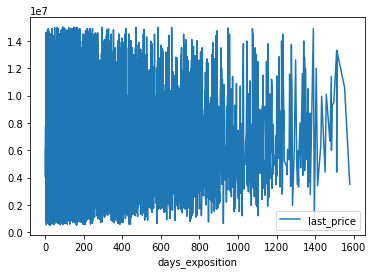

In [142]:
(data
 .sort_values(by='days_exposition', ascending=True)
 .plot(x='days_exposition', y='last_price', style = '-')
      )

корреляция

In [143]:
data['days_exposition'].corr(data['total_area'])

0.13244019826646466

Можно проследить зависимость цены от времени которое квартира была размещена. Но эта зависимость не слишком очевидна. Судя по графикам, чем больше время размещения, тем больше цена, но это неверно. Ведь цена - причина, время размещения - следствие. Правильнее будет сказать, что дорогие квартиры покупают реже, чем дешевые, следовательно, их объявления остаются актуальными дольше.

##### Зависимость цены от дня недели

средняя цена для разных дней недели публикации

In [144]:
data.groupby(by='week_day_exposition')['last_price'].agg(['mean', 'count'])

,mean,count
week_day_exposition,,
0,"5,164,444.8",3385
1,"5,243,082.6",3923
2,"5,193,295.6",3704
3,"5,200,717.7",3967
4,"5,129,164.1",3744
5,"5,044,202.6",1829
6,"5,096,202.1",1598


корреляция

In [145]:
data['week_day_exposition'].corr(data['total_area'])

-0.01052876402554079

Можно выделить, что объявления, размещенные в середине недели, дороже (В четверг в среднем дороже). Но разница не слишком большая, так что правильнее будет сделать вывод, что не зависит.

##### Зависимости цены от месяца

средняя цена для разных месяцев публикации

In [146]:
data.groupby(by='month_exposition')['last_price'].agg(['mean', 'count'])

,mean,count
month_exposition,,
1,"5,107,137.4",1383
2,"5,159,742.2",2472
3,"5,153,194.8",2427
4,"5,266,179.8",2239
5,"5,147,130.6",1192
6,"4,938,710.6",1654
7,"5,187,312.6",1574
8,"5,203,920.1",1632
9,"5,323,966.4",1849


корреляция

In [147]:
data['month_exposition'].corr(data['total_area'])

0.008177700881959443

В 1-м, 7-м и 12-м месяцах средняя цена размещаемых квартир в среднем немного выше, чем для размещаемых в другие месяцы. Так же, как и для дня недели, разница в цене небольшая, так что делаем вывод что не зависит.

##### Зависимость цены от года

средняя цена для разных годов публикации

In [148]:
data.groupby(by='year_exposition')['last_price'].agg(['mean', 'count'])

,mean,count
year_exposition,,
2014,"6,955,030.9",104
2015,"5,706,518.2",1055
2016,"5,129,160.1",2593
2017,"5,089,864.5",7649
2018,"5,065,175.9",8053
2019,"5,461,718.7",2696


матрица корреляций

In [149]:
data['year_exposition'].corr(data['total_area'])

-0.0701477445158353

Старые объявления в среднем немного дороже, чем новые, но при этом старых объявлений заметно больше. Если сравнивать объявления за годы с наибольшим количеством объявлений, то очевидных выводов не напрашивается. Делаем вывод, что не зависит.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [150]:
#средняя цена квадратного метра
curr_data = (data
 .groupby('locality_name')['one_square_meter_price']
 .agg(['count', 'mean'])
 .sort_values(by='count', ascending=False)
 .head(10)
)
display(curr_data)

,count,mean
locality_name,,
Санкт-Петербург,14383,"107,029.3"
посёлок Мурино,562,"85,443.0"
деревня Кудрово,451,"95,151.0"
посёлок Шушары,436,"78,405.7"
Всеволожск,391,"67,155.6"
Пушкин,349,"100,979.1"
Колпино,337,"75,333.3"
посёлок Парголово,323,"90,289.8"
Гатчина,307,"68,746.1"


In [151]:
best_locality_names = ["Санкт-Петербург", "посёлок Мурино", "деревня Кудрово", \
                       "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", \
                      "посёлок Парголово", "Гатчина", "Выборг"]
curr_data = data.loc[data['locality_name'].isin(best_locality_names)]
display((curr_data
 .groupby('locality_name')['one_square_meter_price']
 .agg(['count', 'mean'])
 .sort_values(by='mean', ascending=False)))

,count,mean
locality_name,,
Санкт-Петербург,14383,"107,029.3"
Пушкин,349,"100,979.1"
деревня Кудрово,451,"95,151.0"
посёлок Парголово,323,"90,289.8"
посёлок Мурино,562,"85,443.0"
посёлок Шушары,436,"78,405.7"
Колпино,337,"75,333.3"
Гатчина,307,"68,746.1"
Всеволожск,391,"67,155.6"


#### Зависимость цены от расстояния до центра

In [152]:
#средняя цена для различных расстояний от центра
curr_data = (data
 .loc[data['locality_name'] == 'Санкт-Петербург']
 .groupby('cityCenters_nearest_km')['last_price'].agg(['mean', 'count']))
display(curr_data)

,mean,count
cityCenters_nearest_km,,
0,"9,606,153.8",13
1,"9,178,834.6",127
2,"9,055,644.1",222
3,"8,294,865.9",293
4,"8,536,684.5",549
5,"8,496,607.6",690
6,"7,880,281.1",461
7,"7,226,866.2",311
8,"7,190,914.8",505


<AxesSubplot:xlabel='cityCenters_nearest_km'>

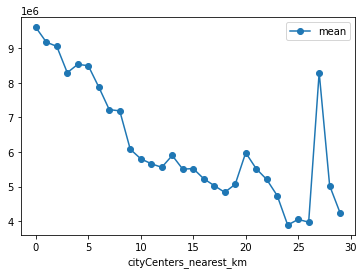

In [153]:
#график зависимости цены от расстояния от центра города
curr_data.plot(y='mean', style='-o')

In [154]:
curr_data = (data
 .loc[data['locality_name'] == 'Санкт-Петербург']
            )

In [155]:
curr_data['cityCenters_nearest'].corr(curr_data['last_price'])

-0.39346923914861925

Из графика и сводной таблицы можем видеть, что присутствует обратная зависимость цены квартиры от расстояния до центра.

### Напишите общий вывод

1. Были заполнены пропущенные значения. Пропуски в количественных значениях - медианой, в качественных - наиболее представленных значением или специальным словом
2. Были удалены неявные дубликаты в столбце locality_name
3. Были удалены редкие значения и исправлены/удалены выбросы в столбцах: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа, общее количество этажей, расстояние до центра города, расстояние до ближайшего парка
4. Были удалены редкие и выбивающиеся значения
5. Было показано, что итоговая цена квартиры напрямую зависит от:
    -Общей площади квартиры(высокая положительная корреляция - 0.74)
    -Жилой площади квартиры(высокая положительная корреляция - 0.93)
    -Площади кухни(положительная корреляция - 0.51)
    -Числа комнат(положительная корреляция - 0.80)
   И не зависит от:
    -Времени размещения объявления(очень слабая корреляция - 0.13)
    -Дня недели, месяца и года размещения объявления

6. Было выявлено, что среди населённых пунктов с наибольшим количеством объявлений наибольшая средняя цена квадратного метра наблюдается в Санкт-Петербурге (107 т.р./м^2), Пушкине (101 т.р./м^2) и деревне Кудрово (95 т.р./м^2). Наименьшая средняя цена - в Гатчине (69 т.р./м^2), Всеволожске (67 т.р./м^2) и Выборге (58 т.р./м^2).
7. Была исследована зависимость цены квартиры от расстояния до центра города Санкт-Петербург. Было показано, что с увеличением расстояния от центра средняя цена квартир убывает (величины отрицательно коррелируют, корреляция = -0.39)